<a href="https://colab.research.google.com/github/JonathanNdambaPro/classification/blob/main/Cours_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cours : Classification
Context

With the rapid development of telecommunication industry, the service providers are inclined more towards expansion of the subscriber base. To meet the need of surviving in the competitive environment, the retention of existing customers has become a huge challenge. It is stated that the cost of acquiring a new customer is far more than that for retaining the existing one. Therefore, it is imperative for the telecom industries to use advanced analytics to understand consumer behavior and in-turn predict the association of the customers as whether or not they will leave the company.

Content
This data set contains customer level information for a telecom company. Various attributes related to the services used are recorded for each customer.

Inspiration
Some possible insights could be -

What variables are contributing to customer churn?
Who are the customers more likely to churn?
What actions can be taken to stop them from leaving?


In [ ]:
#@title

!pip install plotly --upgrade
!pip install -U pandas_profiling

from pandas_profiling import ProfileReport
from google.colab import drive
import os 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import typing
from typing import List
import numpy as np


import warnings
warnings.filterwarnings('ignore')

drive.mount('/content/drive')
sep = os.sep
str_path_to_file = f"/content/drive/My Drive/Cours Data/Classification/Data/telecom_churn.csv"

     |████████████████████████████████| 13.1MB 7.4MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 266kB 7.8MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 71kB 6.7MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 604kB 19.4MB/s 
     |████████████████████████████████| 3.1MB 45.2MB/s 
     |████████████████████████████████| 296kB 50.6MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=0731c10cc7e77c4a7df1c20564aac179053ac76c777c6a9aa8e0aa75a767bc05
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=5ce5314a8f68c4223b80a6f0c8d85fc7b772a19e20644736278afbb8d2647929
  Stored in direct

## Data Cleaning
-------------------------------------

In [ ]:
df_train_data = pd.read_csv(str_path_to_file, encoding='cp424')

UnicodeDecodeError: ignored

### Encoding :
Quelque fois on peut rencontrer un probleme d'encoding, surtout lorsque l'acces des donnees n'a pas d'API pour la recuperation de donnees dans ce cas il faut chercher l'encoding.
il n'existe pas de methode a proprement parler qui permet a coup sur de detecter l'encoding mais la librairie chardet permet d'inferer (trouver en cherchant dans les donnees, dans notre exemple notre fichier csv)
des patterns (motif qui se repete, ici les caracteres) et renvoyer une probabilite de l'encoding le plus probable

In [ ]:
import chardet

with open(str_path_to_file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

result

{'confidence': 1.0, 'encoding': 'ascii', 'language': ''}

ici chardet nous recommande d'essayer l'encoding ascii 

In [ ]:
df_train_data = pd.read_csv(str_path_to_file, encoding='ascii')

In [ ]:
#@title
def func_create_noise(df_train_data: pd.DataFrame, coloumns_cat_2_category: List) -> pd.DataFrame:
  """
  Fonction qui permet de creer du bruit


  Parameters:
  ----------------------------
    df_train_data: pd.DataFrame 
    Dataframe d'entree 


  Return:
  -----------------------------
    df_train_data_suffle: pd.DataFrame
    Dataframe modifier  

  """
  dict_create_noise_columns_cat = {1 : 'Yes', 0 : 'No'}
  df_train_data_suffle = df_train_data.sample(frac=1)

  for col in columns_cat_2_category: 
    df_train_data_suffle[col] = df_train_data_suffle[col].apply(lambda x: dict_create_noise_columns_cat[x])

  str_col_noise_cat = 'ContractRenewal'
  str_col_noise_num = 'MonthlyCharge'

  df_train_data_suffle.sort_values(by=str_col_noise_cat, ascending=False).reset_index(inplace=True)
  df_train_data_suffle.loc[(df_train_data_suffle.ContractRenewal == 'Yes') & df_train_data_suffle.index.isin(list(range(1, 50))), str_col_noise_cat]  = 'YiS'
  df_train_data_suffle.loc[(df_train_data_suffle.ContractRenewal == 'Yes') & df_train_data_suffle.index.isin(list(range(100, 150))), str_col_noise_cat]  = 'yEs'
  df_train_data_suffle.loc[(df_train_data_suffle.ContractRenewal == 'Yes') & df_train_data_suffle.index.isin(list(range(200, 250))), str_col_noise_cat]  = 'yEssi'
  df_train_data_suffle.loc[df_train_data_suffle.index.isin(list(range(500, 520))), str_col_noise_cat]  = np.NaN

  df_train_data_suffle.sort_values(by=str_col_noise_cat, ascending=True).reset_index(inplace=True)
  df_train_data_suffle.loc[(df_train_data_suffle.ContractRenewal == 'No') & df_train_data_suffle.index.isin(list(range(1,200))), str_col_noise_cat]  = 'NOOO'
  df_train_data_suffle.loc[(df_train_data_suffle.ContractRenewal == 'No') & df_train_data_suffle.index.isin(list(range(200,400))), str_col_noise_cat]  = 'NOpe'

  df_train_data_suffle.loc[df_train_data_suffle.index.isin(list(range(1,10))), str_col_noise_num]  = np.NaN
  return df_train_data_suffle

columns_cat_2_category=['Churn', 'ContractRenewal', 'DataPlan']
df_train_data_suffle = func_create_noise(df_train_data, columns_cat_2_category)

In [ ]:
df_train_data_suffle

Churn  AccountWeeks ContractRenewal  ... MonthlyCharge  OverageFee  RoamMins
1810    No           124             Yes  ...          54.0       12.05      11.9
2450    No           137             Yes  ...          39.0       11.53      11.9
2043    No            64             Yes  ...          40.6        9.64       6.4
1674   Yes            76              No  ...          64.4       11.59       9.9
1963    No           131             Yes  ...          37.0        9.97      10.1
...    ...           ...             ...  ...           ...         ...       ...
90      No            82             Yes  ...          43.7        9.75      11.1
266     No           114             Yes  ...          77.7        9.65       8.4
1548    No           102             Yes  ...          64.3        8.60      10.3
2998    No            71             Yes  ...          60.1       12.64      12.3
2294    No            59             Yes  ...          43.0        5.80       7.4

[3333 rows x 11 columns]

### Donnees manquantes et inconsitente
------------------------

In [ ]:
df_train_data_suffle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1810 to 2294
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   object 
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3313 non-null   object 
 3   DataPlan         3333 non-null   object 
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3324 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 312.5+ KB


On peut voir ici que deux variables ont des donnees manquantes :
- la premiere etant ContractRenewal un variable categorielle
- la seconde MonthlyCharge une variable numerique

nous allons commencer par le traitement de ContractRenewal

In [ ]:
df_train_data_suffle.ContractRenewal.value_counts()

Yes      2861
No        282
yEs        46
yEssi      44
YiS        42
NOpe       21
NOOO       17
Name: ContractRenewal, dtype: int64

En plus de la problematique de donnees manquante on a aussi a faire a l'incoherence de donnees, en effet quand les entree sont gerer par les erreurs sont frequentes, pour traiter cette problematique nous allons voir la librairie fuzzyword
cette librairie permet de detecter les mot aui se ressemble le plus 

In [ ]:
!pip install fuzzywuzzy

import fuzzywuzzy
from fuzzywuzzy import process

In [ ]:
df_train_data_suffle.ContractRenewal.unique()

array(['Yes', 'No', 'YiS', 'NOpe', 'yEssi', nan, 'yEs', 'NOOO'],
      dtype=object)

Nous allons chercher les mots les plus ressemblant a yes

In [ ]:
df_train_data_suffle['ContractRenewal'] = df_train_data_suffle['ContractRenewal'].str.lower()
array_contract_values = df_train_data_suffle['ContractRenewal'].unique()
list_matches = fuzzywuzzy.process.extract("yes", array_contract_values, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

list_matches

[('yes', 100),
 ('yessi', 75),
 ('yis', 67),
 ('nope', 29),
 ('no', 0),
 (nan, 0),
 ('nooo', 0)]

fuzzywuzzy a detecter plusieurs mots avec ces mots une probabilite, cela va nous permettre de les remplacer par yes, la premiere etape fais ci dessus et de rendre les mots en minuscule, puis on va selectonner a la main les donnees les plus semblables a 'yes'
yessi et yis

In [ ]:
list_word_to_replace = [match[0] for match in list_matches[1:3] if match[1] > 65]
df_train_data_suffle['ContractRenewal'] = df_train_data_suffle['ContractRenewal'].apply(lambda x: 'yes' if x in list_word_to_replace else x)
df_train_data_suffle['ContractRenewal'].value_counts()

yes     2993
no       282
nope      21
nooo      17
Name: ContractRenewal, dtype: int64

On fat la meme chose pour no

In [ ]:
list_matches = fuzzywuzzy.process.extract("no", array_contract_values, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
list_word_to_replace = [match[0] for match in list_matches[0:3] if match[1] > 65]
df_train_data_suffle['ContractRenewal'] = df_train_data_suffle['ContractRenewal'].apply(lambda x: 'no' if x in list_word_to_replace else x)
df_train_data_suffle['ContractRenewal'].value_counts()

yes    2993
no      320
Name: ContractRenewal, dtype: int64

In [ ]:
df_train_data_suffle['ContractRenewal'].value_counts(dropna=False)

yes    2993
no      320
NaN      20
Name: ContractRenewal, dtype: int64

il ne nous reste plus qu'a traiter les valeurs manquantes cette partie a une infnite de solution possible car en fonction de la problematique metier on peut tres bien avoir un sens different pour l'abscence de donnees

solution en l'abscence d'information :
- remplacer par la variable la plus frequente
- remplacer par une valeur quelconaue comme "NO VALUE" l'essentiel c'est que l'on puisse comprendre que cette valeur signifie l'abscence de donnees

ici nous allons utiliser la premiere methode car etant donnees que l'on connait ce probleme on sait que c'est ce qui va le mieux au donnees cependant dans la majorite des cas si vous n'avez aucune connaissance des donnees je vous recommande fortement la deuxieme solution


In [ ]:
df_train_data_suffle['ContractRenewal'] = df_train_data_suffle['ContractRenewal'].fillna(df_train_data_suffle['ContractRenewal'].mode()[0])
df_train_data_suffle['ContractRenewal'].value_counts(dropna=False)

yes    3013
no      320
Name: ContractRenewal, dtype: int64

Passons au traitement des valeurs manquantes pour les variables continue (qui peut prendre une infinite de valeurs et indenombrable(que l'on ne peut pas compter) (temperature, argent, etc))

Dans ce cas de figure existe une nfinite de methode, il y a des recherches en court, ici on va utiliser la methode d'imputation par la mediane, elle donne de bon resultat et est facle a mettre en place.

In [ ]:
df_train_data_suffle.fillna(df_train_data_suffle.median(), inplace=True)

df_train_data_suffle.head()

Churn  AccountWeeks ContractRenewal  ... MonthlyCharge  OverageFee  RoamMins
1810    No           124             yes  ...          54.0       12.05      11.9
2450    No           137             yes  ...          39.0       11.53      11.9
2043    No            64             yes  ...          40.6        9.64       6.4
1674   Yes            76              no  ...          64.4       11.59       9.9
1963    No           131             yes  ...          37.0        9.97      10.1

[5 rows x 11 columns]

Il existe plusieurs type de donnees :

**les donnees discretes** (que l'on peut compter) :
- Nominal (par exemple s'il y avait une variable vetement : Pull, T-shirt, Jean, etc ): que l'on peut nommer sans ordre precis
- Ordinale (par exemple Tres bien, Bien, Assez bien) : il y a un ordre
-Cyclique (jour de la semaine) : il y a un Cycle

**les donnees continue** : numerique que l'on ne peut pas compter en informatique ca serait plus ou moins l'equivalent de flottant.


pour la suite de l'etudes on va separer les donnees en deux categorie les donnees discrete et flottante :

*Astuce : quand le nombre d'element est tres grand dans le cas de discret et que c'est des nombre (dans notre exemple Daycall) on peut les considerer comme etant comme une variable continue car elle adopte le meme type de comportement*


In [ ]:
df_train_data_suffle_cat = df_train_data_suffle.select_dtypes(include=object)
df_train_data_suffle_num = df_train_data_suffle.select_dtypes(exclude=object)

Un describe est une bonne maniere d'avoir rapidement de l'information

In [ ]:
df_train_data_suffle_cat.describe()

Churn ContractRenewal DataPlan
count   3333            3333     3333
unique     2               2        2
top       No             yes       No
freq    2850            3013     2411

In [ ]:
df_train_data_suffle_num.describe()

AccountWeeks    DataUsage  ...   OverageFee     RoamMins
count   3333.000000  3333.000000  ...  3333.000000  3333.000000
mean     101.064806     0.816475  ...    10.051488    10.237294
std       39.822106     1.272668  ...     2.535712     2.791840
min        1.000000     0.000000  ...     0.000000     0.000000
25%       74.000000     0.000000  ...     8.330000     8.500000
50%      101.000000     0.000000  ...    10.070000    10.300000
75%      127.000000     1.780000  ...    11.770000    12.100000
max      243.000000     5.400000  ...    18.190000    20.000000

[8 rows x 8 columns]

## DataViz



**Dictionnaire :**

Churn (Cible) :
-  1 if customer cancelled service, 0 if not

AccountWeeks : 
- number of weeks customer has had active account


DataPlan : 
- 1 if customer has data plan, 0 if not

DataUsage : 
 - gigabytes of monthly data usage


CustServCalls : 
- number of calls into customer service


DayMins :
- average daytime minutes per month


DayCalls : 
- average number of daytime calls


MonthlyCharge :
- average monthly bill


OverageFee :
- largest overage fee in last 12 months

ContractRenewal :
- 1 if customer recently renewed contract, 0 if not


RoamMins : 
- average number of roaming minutes [LE ROAMING, C'EST QUOI ?](https://www.sfrbusiness.fr/room/communications-unifiees/roaming-c-est-quoi.html)

In [ ]:
df_churn = pd.DataFrame(df_train_data_suffle_cat.Churn.value_counts().reset_index())
fig = px.bar(df_churn, x='index', y='Churn')
fig.show()

L'a variable et ce qu'on appelle skewned, une classe est sur-represente par rapport a une autre, dans notre cas elle represente bien la realite car normalement la plupart des adherents n'annule pas leur abonnements






In [ ]:
df_ContractRenewal = pd.DataFrame(df_train_data_suffle_cat.ContractRenewal.value_counts().reset_index())
fig = px.bar(df_ContractRenewal, x='index', y='ContractRenewal')
fig.show()

Logiquement si la plupart des gens n'annule pas leur abonnement c'est qu'il doivent etre satisfait des condition, il n'est donc pas suprennant qu'il le renouvel

In [ ]:
df_DataPlan = pd.DataFrame(df_train_data_suffle_cat.DataPlan.value_counts().reset_index())
fig = px.bar(df_DataPlan, x='index', y='DataPlan')
fig.show()

In [ ]:
df_train_data_suffle_cat['Color'] = df_train_data_suffle_cat.Churn.apply(lambda x : 1 if x == 'Yes' else 0)

fig = px.parallel_categories(df_train_data_suffle_cat, color="Color", dimensions=['DataPlan', 'Churn', 'ContractRenewal'], color_continuous_scale=px.colors.sequential.Inferno)

fig.show()

df_train_data_suffle_cat.drop('Color', axis=1, inplace=True)

In [ ]:
df_crosstab_dataplan_X_Churn = pd.crosstab(df_train_data_suffle_cat.Churn, df_train_data_suffle_cat.DataPlan, normalize=True)

fig = px.imshow(df_crosstab_dataplan_X_Churn)
fig.show()

In [ ]:
df_crosstab_dataplan_X_Churn = pd.crosstab(df_train_data_suffle_cat.Churn, df_train_data_suffle_cat.ContractRenewal, normalize=True)

fig = px.imshow(df_crosstab_dataplan_X_Churn)
fig.show()

On peut observer l'interaction DataPlan et ContractRenewal, on peut deviner que ces variable seules ne sont pas suffsante a expliquer le churn de nos clients

In [ ]:
list_num_columns = df_train_data_suffle_num.columns

In [ ]:
for col in list_num_columns:
  fig = px.histogram(df_train_data_suffle, x=col, color="Churn", marginal="box",
                    hover_data=df_train_data_suffle.columns)
  fig.show()

### Analyse :
AccountWeeks
- on peut voir que  l'activation des deux  population (Churn et non-churn) sont sensiblement les meme 

DataUsage : 
- Globalement il y a trois type de profil, le premier profil est le profil 0 data, il ne semble pas utiliser de presque jamais ces donnees, le deuxieme profl semble c'est la majorite des utilisateurs, une information pertinente de voir l'age de ces utilisateurs et/ou le type d'abonnement.= et la date a laquelle a ete fait cet echantillionnage
- une autre sous population est une population qui utilise entre 150 Mo et 540 Mo
- la derniere tres large 1.55 Go a 4.4 Go

- le Boxplot nous permet de voir que la majorite des churns sont centrer en 0 et que les point qui utilise  des donnees sont considerer comme outliers(point abberant qui n'ont pas un comportement similaire au reste du groupe/population/distribution), alors que la population des non churn on une repartition beaucoup plus large des donnees ce qui semble logique

CutServCalls :
- Globalement on peut voir que les Churns ont plus souvent tendance a appeller le service clients

DaysMin : 
- Les churns ont en moyenne des minutes plus eleve que la population No-Churn

DaysCalls : 
- Les churns ont en moyenne des jours plus eleve que la population No-Churn, cependant pas aussi forte que la variable DaysMin, le metier devrait determiner si cette dfference est discriminante ou non.

MonthlyCharge : 
- les charges des Churns sont en moyenne plus elever 


OverageFee : 
- les charges des Churns sont en moyenne plus elever 

RoamMins : 
- les charges des Churns sont en moyenne plus elever


**Resume** : 

Les churns ne semble pas avoir d'utilisation de donnees mais plutot d'appels, ils ont tendance a plus utiliser les appels, de nos donnees c'est la seule chose qui peut expliquer que globalement ils ont un depassement de forfait en moyenne plus elever.

--------------------------------
Pourquoi ne pas avoir utiliser de test statistique ?

*Au terme de ce long chapitre il convient de faire les remarques suivantes. Les tests sont
un outil essentiel du processus de décision en faveur ou en défaveur d'une hypothèse scientifique. Cela a pu conduire à des excès : un résultat ne pouvait être publié dans certaines
revues que si un test l'avait déclaré statistiquement significatif au risque 5 %.
Un point essentiel concerne la taille des échantillons: l'inférence statistique classique a été
développée pour traiter des « petits}) échantillons de l'ordre de quelques dizaines ou centaines d'observations au plus. En présence de très grandes bases de données le paradoxe est que
tout devient significatif: par exemple, pour un million d'individus, l'hypothèse d'indépendance entre deux variables sera rejetée au risque 5 % si le coefficient de corrélation linéaire
est supérieur en valeur absolue à 0.002, ce qui est sans intérêt pratique. On peut considérer
que l'hypothèse nulle a été mal choisie, mais le problème persiste: l'hypothèse nulle devant
être fixée avant la collecte, ou en tous cas avant l'analyse des données, on aboutira à son rejet
dès qu'elle est trop précise car tout écart même minime devient significatif.
Le problème se pose dans les mêmes termes pour les tests d'ajustement à des modèles: si
les données sont des données réelles et non simulées, on aura tendance à rejeter le modèle. Il
ne faut pas s'en étonner puisqu'un modèle est une simp1ii1cation de la réalité: comment imaginer que l'on puisse représenter des mî11ions d'observations avec seulement 2 ou 3 paramètres ? Ce n'est pas d'ailleurs pour cela qu'il faut nécessairement abandonner le modèle, qui
peut avoir d'autres vertus ... L'analyse des grandes bases de données amène ainsi à repenser
la notion de test et conduit à des recherches nouvelles sur la validation (voir chapitre 19).
Un autre problème se pose quand on effectue un très grand nombre de tests sur les mêmes
données, par exemple en génétique pour savoir si certains caractères sont présents. Il
d'un cas semblable aux comparaisons multiples (voir paragraphe 14.5.1.4) mais de
ampleur. Le risque de rejeter à tort une des hypothèses nulles croît rapidement avec le nombre de tests. Il faut alors recourir à la théorie du contrôle du taux de fausses découvertes
(Benjamini et Hochberg, 1995).* 

**Gilbert Saporta - probabilités analyse des données et statistique** *Chap14 p.370 les tests statistiques*

pour faire simple dans le cas de figure big data les hypotheses 0 sera en tout cas rejeter car la moindre difference sera vu comme significative.






























### Test malgres tout ?
Dans le cas ou vous voudriez tout de meme utiliser un test, je vous recommande le test de permutation car ce dernier ne sollicite aucune hypothese de depart et permet de tester n'importe quoi.

Voir [practical statistics for data scientists 2nd edition de Peter Bruce, Andrew Bruce, Peter Gedeck ](https://www.oreilly.com/library/view/practical-statistics-for/9781492072935/)

**A savoir** : Le point de vu que j'adopte ici et celui d'un analyste, si vous optez pour celui d'un statisticien alors vous devez poser vos hypothese en amount des l'analyse avec l'hypothese 0 modelisant vos croyance.

**Pour les plus curieux** :  si vous voulez adopter une vision bayesien, je vous conseil de l'utiliser quand les donnees sont faible en volume, sinon vous obtiendrai les meme resultat que le point de vu frequentiste.

### Vision Global des variables numeriques : Correlation

In [ ]:
corr = df_train_data_suffle_num.corr()
fig = px.imshow(corr)
fig.show()

on peut voir des correlation evidentes:
- DataUSage & MonthlyCharge
- MonthlyCharge & DayMins

***Attention*** : 
- La correlation n'est capable de detecter uniquement les relations lineaire il faut souvent utiliser des outils comme les nuage de point ou la distribution jointe pour esperer trouver d'autre type de relation
- une correlation nulle n'implique pas une independance mais uniquement aue les deux variable n'ont pas de relation lineaire
- une correlation de 1 n'implique pas que la relation de causalite il peut y a voir un biais de confusion (une troisieme variable  qui explique le comportement des deux autres)

Essayons de voir malgres tout s'il existe des interctions entre les variables numerique, on va regarder si Daysmin et MouthlyCharge

In [ ]:
fig = px.density_contour(df_train_data_suffle, x="DayMins", y="MonthlyCharge", color="Churn", facet_col="Churn")
fig.show()

- On peux voir une legere distinction entre les deux groupe, le groupe des no-churns semble avoir des charges aux mois plus charge mais pas forcement correle au appelle par minute, cela peut etre revelateur qu'il existe une autre raison qui explique le fais que le groupe no-churn paie des mois plus eleve
- pour les churn la relation MonthlyCharge semble etre expliquer en grande partie par Daymins, peut etre que cette categorie de client uncomportement sous-jacent a leur contrat


In [ ]:
fig = px.density_contour(df_train_data_suffle, x="MonthlyCharge", y="CustServCalls", color="Churn", facet_col="Churn")
fig.show()

Sur la population des Churn on peut voir une sous population qui appelle beaucoup le service client alor que sa ccharge mensuelle est plus faible que la majorite des clients, Pourquoi ? 

--------------------------------

On peut continuer a faire interagir des colonne, pour voir si on peut extraire des relations entre elles, l'ideale et d'aboir une bone connaissance metier pour savoir lesquelle faire interagir 

### Plus rapide ?
il existe des librairies de datavz qui font le travail pour vous elles peuvent etre tres utile si vous diposer de peu de temps pour cette partie et que vous voulez avoir une idee globale de votre DataSet 

il en existe trois vraiment utile : 
- Pandas Profiling
- Sweetviz 
- Dtale

ici nous allons utiliser Pandas Profiling pour plus de detail sur les deux autres vous pouvez regarder ce [lien](https://www.youtube.com/watch?v=kHFD7Il0mkg&t=281s) 

In [ ]:
profile = ProfileReport(df_train_data, title='Churn analysis')
profile.to_notebook_iframe()

### ACP : 
On voudrais voir maintenant comment les variable interagisse globalement ensemble, cependant on ne pourra pas capter les relations entre plus de 3 dimension (Largeur, longueur et epaiseur)
L'ACP peut nous permettre de capter une plus ou moins grande partie de l'information des interactions de plus de 3 dimensions

le but de l'acp et d'inferer(trouver a partir des donnees) des variables qui capte plus d'informations que les variables que nous utilisions de base.

Fablesse de l'ACP:
- Si la relations entre les variables est hautement non-lineaires l'ACP ne sera pas en mesure de capter grand chose
- La PCA ne peut pas etre utilise pour des variable categorielle

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
components = pca.fit_transform(df_train_data_suffle_num)

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df_train_data_suffle["Churn"]
)
fig.update_traces(diagonal_visible=False)
fig.show()



In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(df_train_data_suffle_num)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df_train_data_suffle['Churn'])

features = df_train_data_suffle_num.columns.to_list()

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

L'ACP ici ne nous apporte pas enormement d'informations

Les variable semblent etre le plus porteuse d'informations son DaysMins, AccountWeeks, MonthlyCharge 

------------------------------------------------------------

## Analyse non-supervise

Ici nous allons essayer de trouver des sous groupe dans nos donnees, ces sous-groupes vont prendre en consderation tout nos variables et ne seront pas necessairement bloquer par l'hypothese de linearite de l'ACP.

Le premier algorithme que nous allons utiliser est le K-means

-----------------

### K-means

Le K-means est un algorithme relativement simple a comprendre, sont objectif est de trouver les sous groupe les plus homogene intra-clusteur (les point de chaque groupe doivent etre le plus similaire possible) ou les plus heterogene inter-clusteur (les groupe trouve doivent etre les plus dfferents possible)
vous pouvez retenir la definition que vous vous voulez car trouver les plus homogene intra-clusteur est equivalent a les plus heterogene inter-clusteur.

________________________


## Feature engineering (Clustering): 

Ici nous allons rappeller les differentes methodologie de feature engneering possible qui doivent etre execute avant de rentrer dans nimporte auel types de modele.

### Variable categorielle

***Ordinale*** :

![](https://i.imgur.com/tEogUAr.png)
Dans le cas de variale ordinale la meilleur transformation possible est celle des variable ordinal


***Nominal*** (One-hot-encoding) :

![](https://i.imgur.com/TW5m0aJ.png)

Dans la problematique 

### Variable continue :

***Scaling*** :

Le scaling permet de changer l'echelle des valeurs prise par une variable pour que les valeurs de cette derniere soit entre 0 et 1.

![](https://miro.medium.com/max/1200/1*yi0VULDJmBfb1NaEikEciA.png) 

Cette transformation fait en sorte que toute les valeurs soit a la meme echelle et qu'il n'y ai pas de variable trop predominante par rapport a une autre, cela facilte l'entrainement des modeles

*Astuce : Tous les algorithmes ne necessite pas cette transformation mais dans le doute l'appliquer ne deteriore pas les resultats du modele*


***Normalisation*** : cette transformation en plus de scaler les normalise (essaye de les faire ressembler les plus possible a une cloche), certains algorithme necessite transformation comme la regression lineaire

![](https://kharshit.github.io/img/normalization.png)


Il existe plusieurs feature engineering autres que celles-ci mais ce sont les plus simple et les plus utilise.





-------------------------------------------
One-hot-encoding

In [ ]:
pd.get_dummies(df_train_data_suffle_cat)

Churn_No  Churn_Yes  ...  DataPlan_No  DataPlan_Yes
1810         1          0  ...            1             0
2450         1          0  ...            1             0
2043         1          0  ...            1             0
1674         0          1  ...            1             0
1963         1          0  ...            1             0
...        ...        ...  ...          ...           ...
90           1          0  ...            1             0
266          1          0  ...            0             1
1548         1          0  ...            1             0
2998         1          0  ...            1             0
2294         1          0  ...            1             0

[3333 rows x 6 columns]

***Remarque*** : dans le one-encoding on veut toujours  N-1 colonnes par rapport au nombres d'etats, par exemple pour les colonnes Churns (Churn_yes et Churn_no) il y a 2 etats possibles No et Yes

 donc on N-1 = 2-1 = 1 colonne
 
churn_yes serai suffisant pas besoin de churn_no. 

La raison est simple quand Churn_no = 0 alors churn_yes = 1 et inversement, il y a une redondance d'informations qui peut engendrer deux types de problemes 

- La malediction des dimensions
- La multicolinearite

Nous detaillerons plus en detail de ces problematiques dans l'exemple de regression.

-------------------------------------
One-hot-encoding ameliore

In [ ]:
df_train_data_one_hot_encoding = pd.get_dummies(df_train_data_suffle_cat, drop_first=True)
df_train_data_one_hot_encoding

Churn_Yes  ContractRenewal_yes  DataPlan_Yes
1810          0                    1             0
2450          0                    1             0
2043          0                    1             0
1674          1                    0             0
1963          0                    1             0
...         ...                  ...           ...
90            0                    1             0
266           0                    1             1
1548          0                    1             0
2998          0                    1             0
2294          0                    1             0

[3333 rows x 3 columns]

In [ ]:
df_train_data_kmeans = pd.concat([df_train_data_suffle_num, df_train_data_one_hot_encoding], axis=1)
df_train_data_kmeans

AccountWeeks  DataUsage  ...  ContractRenewal_yes  DataPlan_Yes
1810           124       0.00  ...                    1             0
2450           137       0.00  ...                    1             0
2043            64       0.26  ...                    1             0
1674            76       0.34  ...                    0             0
1963           131       0.00  ...                    1             0
...            ...        ...  ...                  ...           ...
90              82       0.17  ...                    1             0
266            114       2.27  ...                    1             1
1548           102       0.33  ...                    1             0
2998            71       0.21  ...                    1             0
2294            59       0.00  ...                    1             0

[3333 rows x 11 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

df_train_data_kmeans = pd.concat([df_train_data_suffle_num, df_train_data_one_hot_encoding], axis=1)
sk_scaler = StandardScaler()
sk_scaler.fit(df_train_data_kmeans)
array_train_data_kmeans = sk_scaler.transform(df_train_data_kmeans)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
 
inertia = []
for n_clusters in range(2, 14):
   kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(array_train_data_kmeans)
   inertia.append(kmeans.inertia_ / n_clusters)
 
inertias = pd.DataFrame({'n_clusters': range(2, 14), 'inertia': inertia})
 
fig = px.line(inertias, x="n_clusters", y="inertia", title='inertie par Nombre de clusteur')
fig.show()



### Selection du nombre de clusteur :

pour la selection du clusteur on doit regarder la courbe d'inertie. pour faire simple l'inertie calcule globalement a quel point les groupes cree sont homogenes.
on pourrait se dire qu'on selectionne le moment l'inertie est le plus bas, cependant cela nous pousserai a choisir un trop grand nombre de clusteur qui serai trop specialiser, c'est une forme de sur apprentissage, au lieu de ca on va utiliser une methode qui s'appelle la methode de elbow.

la methode elbows consite a choisir le nombre de clusteur ou il y a une inflection dans la courbe, dans notre exemple on peut voir que les inflection se produise en 3 et en 4, l'on vas chosir 3.

Ici le nombre d'elements 

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(array_train_data_kmeans)

df_train_data_kmeans['Clusteur'] = kmeans.labels_

### Analyse des clusteurs 

pour analyser les clusteurs on va comparer les moyennes de chaque groupe est essayer de les interpreter


In [ ]:
df_train_data_kmeans

import plotly.graph_objects as go

list_col_num = [w for w in df_train_data_suffle_num.columns]
list_col_little = ['DataUsage', 'CustServCalls', 'OverageFee', 'RoamMins']
list_col_num_big = [w for w in list_col_num if w not in list_col_little]
list_col_cat = [w for w in df_train_data_kmeans.columns if w not in list_col_num and w != 'Clusteur']

from typing import List

def return_viz_kmeans_compare(df_train_data_kmeans: pd.DataFrame, list_:List, *args) -> None:
  fig = go.Figure(data=[
      go.Bar(name='Clusteur_0', x=list_, y=df_train_data_kmeans.query('Clusteur == 0')[list_].mean().to_list()),
      go.Bar(name='Clusteur_1', x=list_, y=df_train_data_kmeans.query('Clusteur == 1')[list_].mean().to_list()),
      go.Bar(name='Clusteur_2', x=list_, y=df_train_data_kmeans.query('Clusteur == 2')[list_].mean().to_list())
  ])

  fig.update_layout(barmode='group')
  fig.show()



list_clusteur = ['Clusteur_0', 'Clusteur_1', 'Clusteur_3']
return_viz_kmeans_compare(df_train_data_kmeans , list_col_num_big)
return_viz_kmeans_compare(df_train_data_kmeans , list_col_little)
return_viz_kmeans_compare(df_train_data_kmeans , list_col_cat)

On peut voir que notre clusteur a reussi a trouver des classes interessante :
- le clusteur 0 est compose uniquement de profil churn comme 100%, on dirait que le clustering a reussi a les separer du reste de la population
    - les churns appelent plus en moyenne que le reste de la population
    - ils ont plus souvent de frais supplementaire (les difference etant faible il faut etre prudent et verifier ces hypotheses avec un expert metier)
    - ils ont tendance a appele plus souvent le service client


On peut continuer l'analyse, on peut d'ailleurs comparer d'autres parametre comme la variance, les modes, les medianes etc... Cependant on doit bien avoir en tete le sens de ce que l'on compare.

## Classification



### Regression Logistique


La regression logistique est un modele lineaire de machine learning.

***Modele lineaire :***

un modele lineaire est un modele qui ne peut(dans le cas de la classification) definir une separation de classe uniquement par une droite



***Modele non-lineaire :***

Un modele non-lineaire lui peut en fonction des parametres qui lui sont propre adopter des courbe differente d'une droite


![](https://www.researchgate.net/profile/Zena_Hira/publication/279274803/figure/fig4/AS:324752402075653@1454438414424/Linear-versus-nonlinear-classification-problems.png)





In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

df_train_data_classification = pd.concat([df_train_data_suffle_num, df_train_data_one_hot_encoding], axis=1)
X, Y = df_train_data_classification.drop('Churn_Yes', axis=1), df_train_data_classification[['Churn_Yes']]
sk_scaler = StandardScaler()
sk_scaler.fit(X)
X_scaled = sk_scaler.transform(X)

On va separer note jeu de donnees en deux sinon L'algorithme auras deja vu la reponse et l'accuracy sera de 100%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)                                                
logistic_clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = logistic_clf.predict(X_test)

str_pourcentage = f"Prediction en pourcentge : {accuracy_score(y_test, y_pred)} \n"
str_count = f"Prediction en Nombre : {accuracy_score(y_test, y_pred, normalize=False)} / {len(y_pred)} \n"

print("".join([str_pourcentage, str_count]))

Prediction en pourcentge : 0.8654545454545455 
Prediction en Nombre : 952 / 1100 



### Validation croisee 

Dans notre exemple nous avons teste notre jeu de donnees uniquement sur un test, mais rien ne ne prouve que nous n'avons pas eu un coup de chance, nous devons faire une validation croisee 

![alt text](https://www.researchgate.net/profile/Mariia_Fedotenkova/publication/311668395/figure/fig5/AS:613923871019041@1523382265447/A-schematic-illustration-of-K-fold-cross-validation-for-K-5-Original-dataset-shown.png)

l'idee est la suivante, au lieu de tester notre jeu de donnees sur un seul test on va le tester sur N tests et faire la moyenne sur tout nos tests

ce methode nous donnera une idees bien plus precise sur la capacite d'apprentissage de notre modele

In [ ]:
from sklearn.model_selection import cross_val_score


logistic_clf = LogisticRegression(random_state=0)
skl_cross_val = cross_val_score(logistic_clf, X, Y, cv=3)

array_cross_val = skl_cross_val
mean_cross_val = skl_cross_val.mean()

print(f"Resultat CrossVal {array_cross_val} \nMoyenne CrossVal {mean_cross_val}")

Resultat CrossVal [0.85148515 0.85148515 0.8649865 ] 
Moyenne CrossVal 0.855985598559856


Les Resultats sont sensiblemnt les meme essayons de voir comment sont repartis les reponses de notre algo rythme avec la matrice de confusion 


### Matrice de confusion 

![](https://user.oc-static.com/upload/2017/03/02/14884666421501_P2C1-1.png)

LA matrice de confusion est une matrice qui permet de voir commet notre algorithme classifie par rapport a la realite et de voir si il se trompe beaucoup, il existe deux informations primordiales la precision et le rappel.

***Rappel & Precision :***

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Precisionrappel.svg/350px-Precisionrappel.svg.png)

*La precision :* va mesurer parmis toute les prevision combien de fois mon algorithme a raison

*Le rappel :* va mesurer parmis tous les exemple positif combien mon algorithme va en capter.


In [ ]:
from sklearn.metrics import confusion_matrix

array_conf_mat = confusion_matrix(y_test, y_pred)

fig = px.imshow(array_conf_mat, title="Matrice de confusion")
fig.show()

from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, *args = score(y_test, y_pred)

list_columns = ['Precision', 'Rappel']
df_precision_recall = pd.DataFrame(columns=list_columns)
df_precision_recall['Precision'] = precision
df_precision_recall['Rappel'] = recall

print("Precision & Rappel :\n")
df_precision_recall

Precision & Rappel :



Precision    Rappel
0   0.888145  0.967708
1   0.425926  0.164286

On peut voir un phenome interessant, notre modele predit quasiment uniquement des valeurs 0 (pas de churn) au point ou il se trompe pour la majorite des points 1(churn).
Ce phenomene est du a la sur-representation de la classe 0, 
en effet cette notre algorithme ce dit que comme il y a une grande majorite de 0 il n'a qu'a renvoyer de 0 est il aura a une grande majorite de 0 pas churn, d'un point de vu mathematique effectivement il auras raison a 90%(Nombre abitraire) du temps mais d'un point vu reel on sera totalement incable d'identifier et predire les churn et donc n'aura aucune .

On peut identifier cette problematique en ce concentrant uniquement sur la precision et rappel, la regression logistique capture bien le rappel et la precision de la classe 0 mais tres mal celles de la classe 1, il faudrait faire comprendre a notre algorithme qu'il doit prendre en compte le rappel de la classe 1.

***ROC & AUC :***

La metrique(comment mesurer notre erreur) Roc permet de prendre en compte la precion et le rappel(les details mathematique sont plus specifique mais l'intuition est la) pour que chaque classe est la meme importance et eviter ce genre de problematique,

L'AUC est l'aire sous la courbe (area under the curve) de la ROC, plus la ROC est proche de 1 plus on s'approche d'un classifieur parfait, on utilisera l'AUC pour la suite


*Astuce : il existe une multitude de methode pour ce genre de probleme mais l'AUC est largement utilise et traite bien ce genre de probleme.*



![](https://developers.google.com/machine-learning/crash-course/images/AUC.svg?hl=fr)


***Oversampling & Undersampling :***

Dans la majorite des cas pour ce genre de proble de classe sur-represente le changement de metrique n'est pas suffisant (surtout pour le modele lineaire qui ont souvent peut de parametre et/ou capacite)

On va donc essayer d'augmenter le nombres d'elements de la classe sous-represente (Ici les Churns) ou reduire le nombre de la classe sous represente (les non-churns)






In [ ]:
df_churn = pd.DataFrame(df_train_data_suffle_cat.Churn.value_counts().reset_index())
fig = px.bar(df_churn, x='index', y='Churn', title="Difference de taille des classes")
fig.show()

In [ ]:
logistic_clf = LogisticRegression(random_state=0)
skl_cross_val = cross_val_score(logistic_clf, X, Y, cv=5, n_jobs=-1, scoring='roc_auc')

array_cross_val = skl_cross_val
mean_cross_val = skl_cross_val.mean()

print(f"Resultat CrossVal {array_cross_val} \nMoyenne CrossVal {mean_cross_val}")

Resultat CrossVal [0.79211431 0.80282149 0.78374028 0.8153326  0.76467471] 
Moyenne CrossVal 0.7917366763127751


### Undersampling

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
X_cc, y_cc = cc.fit_sample(X, Y)

logistic_clf = LogisticRegression(random_state=0)
skl_cross_val = cross_val_score(logistic_clf, X_cc, y_cc, cv=5, n_jobs=-1, scoring='roc_auc')

array_cross_val = skl_cross_val
mean_cross_val = skl_cross_val.mean()

print(f"Resultat CrossVal {array_cross_val} \nMoyenne CrossVal {mean_cross_val}")

Resultat CrossVal [0.70103093 0.87113402 0.6185567  0.97916667 0.8125    ] 
Moyenne CrossVal 0.7964776632302406


### Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, Y)

logistic_clf = LogisticRegression(random_state=0)
skl_cross_val = cross_val_score(logistic_clf, X_sm, y_sm, cv=5, n_jobs=-1, scoring='roc_auc')

array_cross_val = skl_cross_val
mean_cross_val = skl_cross_val.mean()

print(f"Resultat CrossVal {array_cross_val} \nMoyenne CrossVal {mean_cross_val}")

Resultat CrossVal [0.82273007 0.83792859 0.8481779  0.83015389 0.8329486 ] 
Moyenne CrossVal 0.8343878116343489


### Oversampling + Undersampling

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, Y)

logistic_clf = LogisticRegression(random_state=0)
skl_cross_val = cross_val_score(logistic_clf, X_smt, y_smt, cv=5, n_jobs=-1, scoring='roc_auc')

array_cross_val = skl_cross_val
mean_cross_val = skl_cross_val.mean()

print(f"Resultat CrossVal {array_cross_val} \nMoyenne CrossVal {mean_cross_val}")

Resultat CrossVal [0.82460656 0.83757042 0.84767461 0.84117647 0.84485612] 
Moyenne CrossVal 0.8391768355373262


### Interpretation de la regression logistique

L'une des forces des modeles lineaires est sont interpretabilite, il est tres facile d'en extraire du sens metier 









In [ ]:
logistic_clf = LogisticRegression(random_state=0).fit(X_smt, y_smt)

list_coef = [float(w) for w in logistic_clf.coef_[0]]
list_name_columns = [w for w in X.columns]

df_interpretation = pd.DataFrame(columns=['Coefficient', 'Nom_colonnes'])

df_interpretation['Coefficient'] = list_coef
df_interpretation['Nom_colonnes'] = list_name_columns

fig = px.bar(df_interpretation, y='Coefficient', x='Nom_colonnes')
fig.show()

- On peut voir qu'appeler frequemment le Service client augmente la probabilite d'etre churn
- les frais en plus augmente le fais d'etre un churn mais moins que prevue 
- le fait d'avoir renouveller sont contract augmente grandement les possbilites de ne pas etre Churn
- avoir souscrit a un DataPlan augmente la probabilite de ne pas etre churn

### interpretation complete : 

Pour les personnes les plus curieuses, l'intepretation peut etre plus precise pour le modele de la regression logistique, si on passe les coefficients a l'exponentiel on a le rapport entre les probabilites des deux classes l'odds ratio.

***L'odds ratio***: 

si on a deux probabilites p1 et p2 l'odds ratio est le rapport des deux, cela permet d'indentifier le nombre de fois que l'on a de chance de voir un evement se produire par rapport par un autre

exemple :

p1 : probabilite de ne pas voir un chat

p2 : probabilite de voir un chat

ici p1 = 0.8 et p2 = 0.2 
comme les evenement son complementaire (si l'un se produit alors l'autre ne se produit pas) on a p2 = 1 - p1

$\frac{p1}{p2} = \frac{p1}{1-p1} = \frac{0.8}{0.2} = 4$

on a donc 4 fois plus de chance devoir un chat dans cette exemple




In [ ]:
logistic_clf = LogisticRegression(random_state=0).fit(X_smt, y_smt)

list_coef_Churn = [float(np.exp(w)) for w in logistic_clf.coef_[0]]
list_coef_NoChurn = [1/w for w in list_coef_Churn]

list_name_columns = [w for w in X.columns]

df_interpretation = pd.DataFrame(columns=['Coefficient', 'Nom_colonnes'])

df_interpretation['Coefficient'] = list_coef_Churn
df_interpretation['Nom_colonnes'] = list_name_columns
fig = px.bar(df_interpretation, y='Coefficient', x='Nom_colonnes', title="Odds ratio Churn/No_Churn")
fig.show()

df_interpretation['Coefficient'] = list_coef_NoChurn
fig = px.bar(df_interpretation, y='Coefficient', x='Nom_colonnes', title="Odds ratio NoChurn/Churn")
fig.show()

De ces tableau on peut extraire de l'information par exemple : 

- on a presque 2 fois plus de chance d'etre churn si on appelle le service client de maniere recurrente
- on a 25 fois plus de chance de ne pas etre churn si on renouvelle le contrat

**Attention** : il peut etre important d'effectuer des tests statistiques pour determiner si les coefficient son significatif

### Les limites : 

les modeles lineaires ont certaine limite :
- incapable de prendre en consideration les relations entre les variables, par exemple si on veut accorder un pret un modele lineaire ne prendra en compte uniquement les revenus mais pas l'age alors qu'une personne jeune avec un bon salaire et un potentiel meilleur clients qu'une personne avec le meme salaire mais en fin de carriere

- les modeles de machine learning sont incapable d'extrapoler, si on considere l'exemple de predire le prix d'une maison un modele pourrait detecter l'espace en metre carre comme important mais si l'on considere les fermes et qu'il n'a pas ete entraine pour detecter que l'espace n'est plus autant important dans ce cas de figure il predira une valeur bien au-dessus de sa valeur reelle considerant que les appartement haussmanien est une ferme quelconque suivent les meme regles.

il en existe d'autres mais c'est deux la justifie l'utilisation de modele non lineaire.


## Modele non-lineaire

### Arbres de decision

---------------------------

Les arbres de decision sont des modeles non-lineaire dans le sens ou ils peuvent detecter les relations entre les variables, l'objectif d'un arbre de decision et qu'a chaque split(separation) le nouveau noeud cree soit le plus homogene possible.

![](https://www.sqlshack.com/wp-content/uploads/2019/09/sample-of-a-decision-tree.png)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X_oversampling = pd.DataFrame(X_smt, columns=X.columns)
y_oversampling = pd.DataFrame(y_smt, columns=['Churn'])

tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(X_oversampling, y_oversampling)

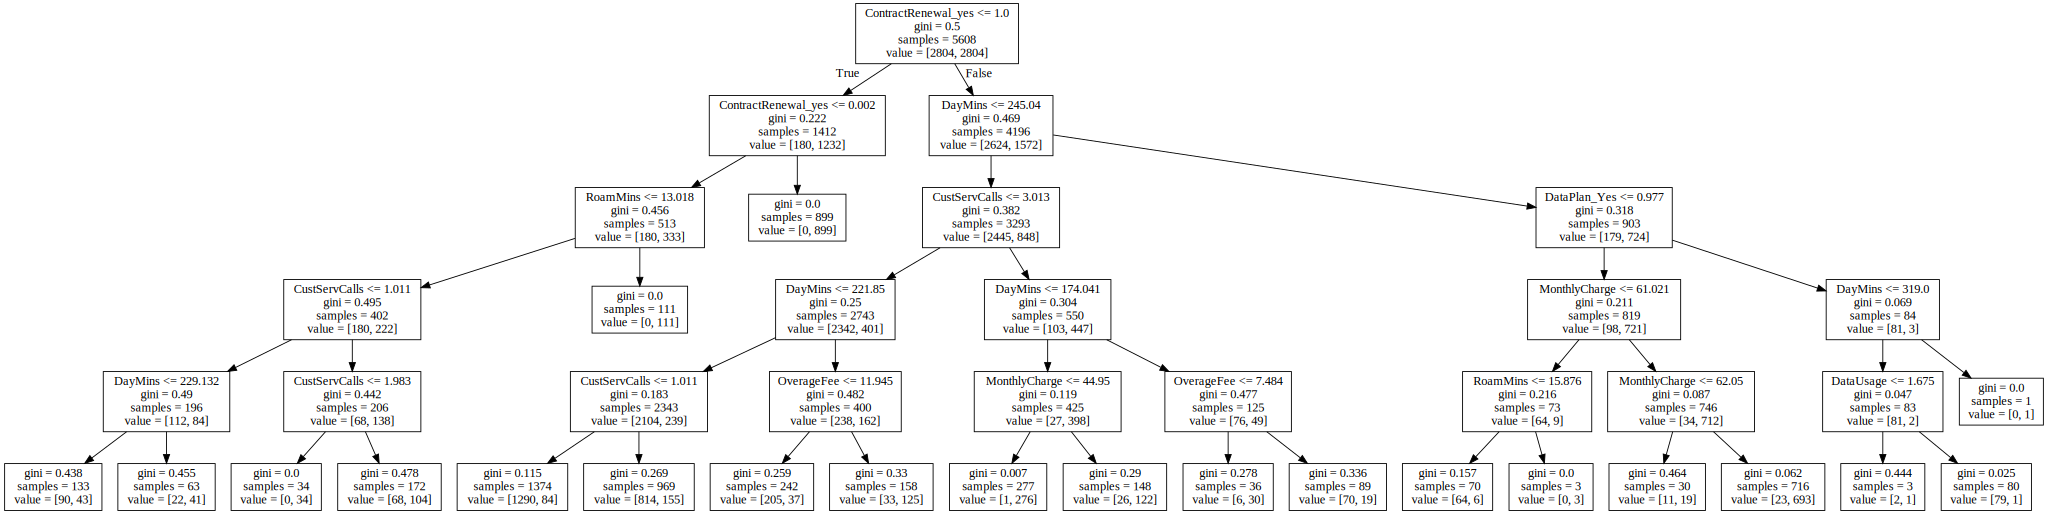

In [ ]:
from sklearn import tree
import graphviz

feature_names = X.columns

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

Gini est notre critere de separation, il mesure le "desordre" du noeud, a chaque iteration on cherche a reduire ce critere et donc a rendre le noeud fils le plus homogene possible.

la force de l'arbre de decision est qu'il est interpretable on voit clairement les variable qui le sert a faire ces separations et donc comprendre les regles metier de plus en observant les noeuds les plus haut on voit clairement quelles variables sont le plus discriminantes et donc importante :

- ContractRenewal
- DayMins
- CustServCalls
- DataPlan

Cependant il est tres peu fiable pour les predictions, pour faire simple les derniers noeuds qui nous sert a faire des predictions peuvent grandement changer si on ajoute ou retire des points les prevision changerons totalement  pour parer a ce probleme il existe deux de methodes bien connu :

- le bagging qui generera le Random Forest 
- le bagging qui genera le Gradient Boosting


------------------------------------------

### Random Forest

Le Boosting consiste a utiliser plusieurs modeles differents et d'aggreger leur resultats pour obtenir un resultat plus stable

pour le Random Forest on vas utiliser un ensemble d'arbres (d'ou le Forest) et pour chaque arbre on va lui donner un ensemble d'exemple au hasard (D'ou le Random), pour s'assurer que les arbres soit suffisement differents on va en plus choisir hasard un nombre de variable

Imaginer que fasse a une foule on demande quel est le poids moyen d'une vache, en fonction de son experience propre et ces connaissances chaque personnes aura une reponse plus ou moins loin de la realite mais en faisant la moyenne de toutes les reponse on a remarque que la reponse moyenne etait tres proche de la realite, c'est l'intelligence collective. 

Eh bien pour le random forest l'idee est la meme on se dit que un arbre seul n'est pas tres bon pour predire une reponse mais qu'un ensemble d'arbre lui se debrouille mieux


![](https://miro.medium.com/max/1200/0*YEwFetXQGPB8aDFV)

pour les problemes de regression on fera la moyenne de reponse de chaque arbre

pour les problemes de classification on fera un vote pour voir quelle classe est majoritaire

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(max_depth=2, random_state=0)


skl_cross_val = cross_val_score(rand_clf, X_oversampling, y_oversampling, cv=5, n_jobs=-1, scoring='roc_auc')

array_cross_val = skl_cross_val
mean_cross_val = skl_cross_val.mean()

print(f"Resultat CrossVal {array_cross_val} \nMoyenne CrossVal {mean_cross_val}")


Resultat CrossVal [0.89829087 0.93843754 0.92829045 0.92922396 0.93645435] 
Moyenne CrossVal 0.926139434950775


### Gradient Boosting

Le Gradient Boosting est egalement une methode ensembliste(qui utilise plusieurs modeles)
cependant il existe plusieurs nuances.

Premierement le boosting utilise des modeles avec peu de variance(Voir compromis biais-variance plus bas).

Deuxiemement le boosting lui n'entraine pas les modeles en parrallele (chacun de sont cote) mais en serie, pour faire plus simple chaque modele essaye d'ameliorer le resultat du modele precedent et ainsi de suite jusqu'a la sortie finale

![link text](https://miro.medium.com/max/3908/1*FoOt85zXNCaNFzpEj7ucuA.png)




In [ ]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier()

skl_cross_val = cross_val_score(lgb_clf, X_oversampling, y_oversampling, cv=5, n_jobs=-1, scoring='roc_auc')

array_cross_val = skl_cross_val
mean_cross_val = skl_cross_val.mean()

print(f"Resultat CrossVal {array_cross_val} \nMoyenne CrossVal {mean_cross_val}")

Resultat CrossVal [0.94103349 0.99849073 0.99740723 0.99900369 0.99621212] 
Moyenne CrossVal 0.9864294508923324
